<a href="https://colab.research.google.com/github/Marlonsemj/Python/blob/main/01_Econometria_II_Tend%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Tendência em Séries Temporais com Python
-------
> A **tendência** descreve o comportamento de uma variável na série temporal no longo prazo.

**Objetivos básicos na sua identificação:**
- Identificar a tendência e avaliar o seu comportamento para utilizá-lo em previsões;
- removê-la da série para facilitar a visualização das outras componentes.

<center>Y = β<sub>0</sub> + β<sub>1</sub>T + ε</center>

------
# Análise de Tendência (T)
**Há dois tipos de tendência: Determinística ou Estocástica**

> - **Tendência determinística:** São aquelas que ocorrem de maneira previsível, e por isso, conseguimos prevê-las.

Para exemplificar, vamos considerar uma série temporal (Y), e que somente estejam presentes a Tendência (T) e as variações irregulares, ou erros.

<Center>

`𝒀 = 𝑻 + 𝜺`</center>

Na equação acima, Y representa a série temporal, enquanto **T** representa a **tendência**, que é **expressa pelo tempo (t = 0, 1, 2, 3, ..., n)**.


Há diversas maneiras de extrair a Tendência Determinística de uma série.

## Método de regressão (via MQO):
O objetivo é ajustar o comportamento da série temporal (Y) em função da tendência (tempo: T).

Nesse sentido, a tendência pode ser descrita de diversas maneiras:

<center>

### 𝒀 = <font color="#696AC9">𝑻</font> + 𝜺</center>

> - 𝒀 = <font color="#696AC9">𝜷<sub>𝟎</sub> + 𝜷<sub>𝟏</sub> 𝑻 </font>+ 𝜺 → (tendência linear)
> - 𝒀 = <font color="#696AC9">𝜷<sub>𝟎</sub> + 𝜷<sub>𝟏</sub>𝑻 + 𝜷<sub>𝟏</sub> 𝑻<sup>𝟐</sup></font> + 𝜺  →  (tendência quadrática)
> - 𝒀 = <font color="#696AC9">𝜷<sub>𝟎</sub> 𝒆<sup>(𝜷<sub>𝟏</sub> 𝑻)</sup></font> 𝜺  →  (tendência exponencial)

Os valores em <font color="#696AC9">roxo</font> na equação acima (𝒀 ̂ ) representam a <font color="#696AC9">tendência da série temporal</font>.

- Identificar a tendência e avaliar o seu comportamento para utilizá-lo em previsões: (𝒀 ̂ )

- removê-la da série para facilitar a visualização das outras componentes:
𝒀 −𝒀 ̂= 𝜺

           Países  2024 - Valor US$ FOB  2023 - Valor US$ FOB  \
0           China           46306842843           53175757148   
1  Estados Unidos           30695380205           37958896968   
2        Alemanha           10560722401           13147236762   
3       Argentina            9711594052           11997506946   
4          Rússia            8471794040           10012627611   

   2022 - Valor US$ FOB  2021 - Valor US$ FOB  2020 - Valor US$ FOB  \
0           60743964876           47650945510           34778441387   
1           51304351542           39385250785           27875749399   
2           12807743944           11346499464            9369072621   
3           13099925718           11948896309            7897095769   
4            7853002061            5698759353            2747251333   

   2019 - Valor US$ FOB  2018 - Valor US$ FOB  2017 - Valor US$ FOB  \
0           36028297004           35157236888           27553978176   
1           34774253640           328313

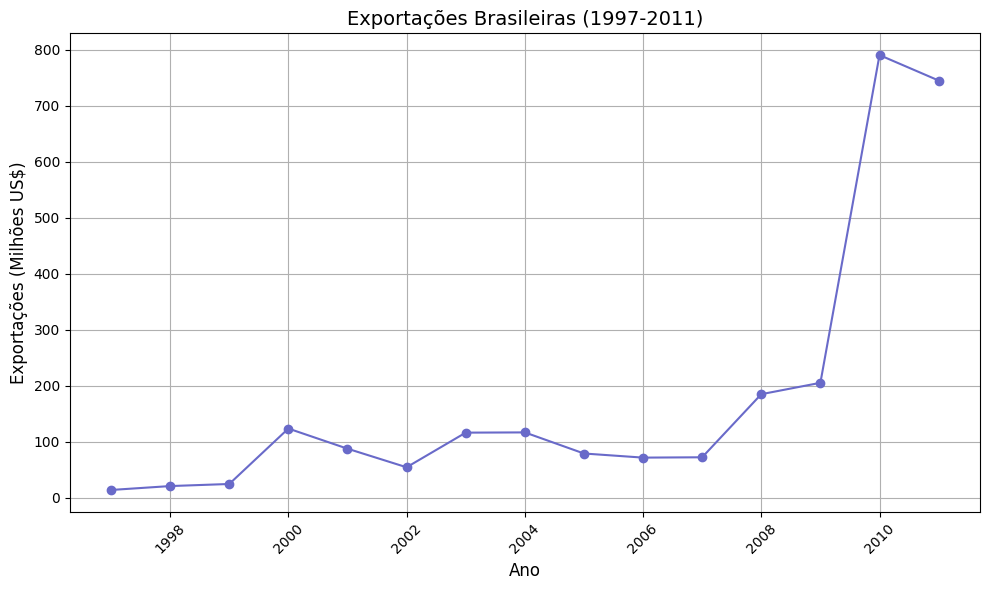

In [13]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Exibir as primeiras linhas do DataFrame para garantir que foi carregado corretamente
print(df.head())

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Países' se necessário)
df_brasil = df[df['Países'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exportações do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Converter os valores de exportações para milhões (dividindo por 1 milhão)
valores_exportacoes_milhoes = valores_exportacoes / 1_000_000

# Criar um DataFrame com os anos e valores em milhões de dólares
df_exportacoes_brasil = pd.DataFrame({
    'Ano': anos,
    'Exportações (milhões US$)': valores_exportacoes_milhoes
})

# Definir a coluna 'Ano' como índice
df_exportacoes_brasil.set_index('Ano', inplace=True)

# Criar o gráfico
plt.figure(figsize=(10,6))
plt.plot(df_exportacoes_brasil.index, df_exportacoes_brasil['Exportações (milhões US$)'], marker='o', linestyle='-', color='#696AC9')
plt.title('Exportações Brasileiras (1997-2011)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Exportações (Milhões US$)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


*FOB - Free on Board: É um termo de comércio internacional que indica que o vendedor/exportador assume todos os custos e riscos até que as mercadorias sejam carregadas no navio para exportação. A partir desse ponto, o comprador/importador é responsável pelo transporte, seguro e outros custos até o destino final.*

In [12]:
# Importar bibliotecas necessárias
import pandas as pd
import statsmodels.api as sm

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Países' se necessário)
df_brasil = df[df['Países'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exportações do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Criar um DataFrame com os anos e valores em dólares
df_exportacoes_brasil = pd.DataFrame({
    'Ano': anos,
    'Exportações (US$)': valores_exportacoes
})

# Verificar e converter os tipos de dados
df_exportacoes_brasil['Exportações (US$)'] = pd.to_numeric(df_exportacoes_brasil['Exportações (US$)'], errors='coerce')

# Remover entradas com valores NaN
df_exportacoes_brasil = df_exportacoes_brasil.dropna()

# Definir a variável dependente (y) e a variável independente (X)
X = df_exportacoes_brasil['Ano']  # Variável independente (anos)
y = df_exportacoes_brasil['Exportações (US$)']  # Variável dependente (exportações)

# Adicionar uma constante ao modelo (necessário para a interceptação)
X = sm.add_constant(X)

# Ajustar o modelo de regressão OLS (MQO)
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:      Exportações (US$)   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     13.00
Date:                Fri, 18 Oct 2024   Prob (F-statistic):            0.00320
Time:                        01:42:06   Log-Likelihood:                -305.30
No. Observations:                  15   AIC:                             614.6
Df Residuals:                      13   BIC:                             616.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.732e+10   2.15e+10     -3.597      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Modelo linearizado é dado por:
- 𝒀 = <font color="#696AC9">𝜷<sub>𝟎</sub> 𝒆<sup>(𝜷<sub>𝟏</sub> 𝑻)</sup></font> 𝜺  →  (tendência exponencial)


<center>
𝒍𝒏𝒀 = <font color="#696AC9">𝒍𝒏𝜷<sub>𝟎</sub> + 𝜷<sub>1</sub> 𝑻</font> + 𝒍𝒏𝜺 </center>


Os parâmetros estimados no modelo exponencial não possuem interpretação direta.

Deve-se calcular o antilogaritmo para obter os coeficientes corretamente.



Quando você tem um modelo de regressão exponencial, a relação entre as variáveis é expressa como \(y = ae^{bx}\), onde \(a\) e \(b\) são os coeficientes que você estima. Para obter a interpretação correta dos coeficientes em uma regressão exponencial, você deve calcular o antilogaritmo (exponencial) do intercepto e considerar a transformação da variável dependente.

### Ajuste do Modelo Exponencial

1. Transforme a variável dependente aplicando o logaritmo natural.
2. Realize a regressão linear nos dados transformados.
3. Calcule o antilogaritmo do intercepto após ajustar o modelo.

Aqui está o código para realizar esses passos:

In [14]:
# Importar bibliotecas necessárias
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Países' se necessário)
df_brasil = df[df['Países'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exportações do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Criar um DataFrame com os anos e valores em dólares
df_exportacoes_brasil = pd.DataFrame({
    'Ano': anos,
    'Exportações (US$)': valores_exportacoes
})

# Verificar e converter os tipos de dados
df_exportacoes_brasil['Exportações (US$)'] = pd.to_numeric(df_exportacoes_brasil['Exportações (US$)'], errors='coerce')

# Remover entradas com valores NaN
df_exportacoes_brasil = df_exportacoes_brasil.dropna()

# Transformar a variável dependente (log das exportações)
df_exportacoes_brasil['log_Exportações'] = np.log(df_exportacoes_brasil['Exportações (US$)'])

# Definir a variável dependente (y) e a variável independente (X)
X = df_exportacoes_brasil['Ano']  # Variável independente (anos)
y = df_exportacoes_brasil['log_Exportações']  # Variável dependente transformada

# Adicionar uma constante ao modelo (necessário para a interceptação)
X = sm.add_constant(X)

# Ajustar o modelo de regressão OLS (MQO) no logaritmo das exportações
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

# Calcular os coeficientes em termos de exportações
intercepto = modelo.params['const']
coef_ano = modelo.params['Ano']

# Calcular o antilogaritmo para o intercepto
a = np.exp(intercepto)  # Valor do intercepto em termos de exportações
b = coef_ano  # Coeficiente da variável Ano

# Exibir os resultados
print(f"Intercepto (a): {a}")
print(f"Coeficiente do Ano (b): {b}")


                            OLS Regression Results                            
Dep. Variable:        log_Exportações   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     37.00
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.89e-05
Time:                        01:53:36   Log-Likelihood:                -12.618
No. Observations:                  15   AIC:                             29.24
Df Residuals:                      13   BIC:                             30.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -420.7157     72.189     -5.828      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


### Explicação do Código:

1. **Transformação Logarítmica:** O valor das exportações é transformado usando `np.log()`.
2. **Ajuste do Modelo:** A regressão é realizada sobre a variável logarítmica.
3. **Cálculo do Antilogaritmo:** O antilogaritmo do intercepto é calculado usando `np.exp()`, que fornece uma interpretação direta em termos de exportações.

### Interpretação:
- O intercepto \(a\) representa o nível de exportações quando o ano é zero (não aplicável diretamente, mas pode ser interpretado como uma base para a análise).
- O coeficiente \(b\) representa a variação percentual nas exportações para cada incremento de um ano, expresso em logaritmos.

Você pode executar esse código no Google Colab, e ele irá fornecer os coeficientes corretamente ajustados para o modelo exponencial.

### Interpretação da Regressão:
Aqui está uma interpretação resumida dos resultados da regressão OLS aplicada à transformação logarítmica das exportações brasileiras:

### Resultados da Regressão

- **Variável Dependente:** log_Exportações
- **Número de Observações:** 15

### Estatísticas do Modelo

- **R-squared (R²):** 0.740  
  Aproximadamente 74% da variação nas exportações (em termos logarítmicos) é explicada pelo modelo, o que indica um bom ajuste.

- **Adj. R-squared:** 0.720  
  O valor ajustado para o R², que leva em conta o número de variáveis independentes, também sugere que o modelo é robusto.

- **F-statistic:** 37.00  
  Este valor alto indica que o modelo é significativo e que as variáveis explicativas têm um impacto significativo sobre a variável dependente.

- **Prob (F-statistic):** 3.89e-05  
  Um valor muito baixo, indicando que podemos rejeitar a hipótese nula de que todos os coeficientes são iguais a zero.

### Coeficientes

- **Intercepto (const):** -420.7157  
  Este coeficiente representa o logaritmo das exportações quando o ano é zero, mas sua interpretação prática não é relevante. A grande magnitude e o valor negativo sugerem que, sem uma interpretação direta, esse número pode indicar um ponto fora do alcance prático.

- **Coeficiente do Ano (Ano):** 0.2191  
  Este coeficiente significa que, para cada aumento de um ano, espera-se que as exportações aumentem em aproximadamente 21.91% (quando consideramos a transformação logarítmica).

### Erros Padrão e Teste de Significância

- **Erro Padrão do Coeficiente do Ano:** 0.036  
  O erro padrão relativamente baixo sugere que a estimativa do coeficiente é confiável.

- **Valor p:** 0.000  
  Isso indica que o coeficiente do ano é estatisticamente significativo, permitindo-nos concluir que há uma relação positiva entre o tempo e as exportações.

### Diagnóstico do Modelo

- **Durbin-Watson:** 1.165  
  Um valor abaixo de 2 sugere a possibilidade de autocorrelação nos resíduos, o que pode ser uma preocupação.

- **Condition Number:** 9.30e+05  
  Um número de condição elevado pode indicar problemas de multicolinearidade ou instabilidade numérica.

### Conclusão

Os resultados da regressão logarítmica indicam uma relação positiva significativa entre o tempo e as exportações brasileiras, com um aumento percentual considerável a cada ano. Apesar do bom ajuste do modelo, a interpretação do intercepto não é prática, e há preocupações com a autocorrelação e a condição numérica, que devem ser consideradas em análises futuras.

Fonte dos dados: https://comexstat.mdic.gov.br/pt/geral

Uma abordagem amplamente utilizada para a identificação de tendências é o teste *Mann-Kendall*. Esse teste não paramétrico oferece uma maneira objetiva de detectar tendências em séries temporais, sem fazer suposições sobre a distribuição dos dados. Os testes geralmente consideram um nível de significância de 5%.

*Abaixo está um exemplo de como o teste Mann-Kendall pode ser implementado em Python:*

In [4]:
# Instalando a biblioteca do Python - Em Python há apenas a biblioteca pymannkendall, mas é uma biblioteca bastante extensa e com mais testes de tendência.

# Instalar o pacote pymannkendall
!pip install pymannkendall

# Importar o pacote e realizar o teste Mann-Kendall
import numpy as np
import pandas as pd
import pymannkendall as mk

# Simulação de dados de vendas de varejo
dados_vendas = [150, 160, 165, 180, 190, 200, 210, 230, 250, 270]

# Aplicação do teste Mann-Kendall
resultado = mk.original_test(dados_vendas)

# Exibição dos resultados
print(f'Resultado do teste: {resultado}')


Resultado do teste: Mann_Kendall_Test(trend='increasing', h=True, p=8.303070332638107e-05, z=3.9354796403996297, Tau=1.0, s=45.0, var_s=125.0, slope=12.5, intercept=138.75)


Os resultados do teste Mann-Kendall mostram o comportamento da tendência de uma série temporal e são interpretados da seguinte forma:

- **`trend='increasing'`**: A série apresenta uma tendência **crescente**. Isso significa que, ao longo do tempo, os valores da série estão aumentando.
  
- **`h=True`**: O valor `True` indica que, ao nível de significância de 5% (ou outro previamente configurado), há **evidências suficientes** para rejeitar a hipótese nula de que **não há tendência** na série. Ou seja, existe uma tendência estatisticamente significativa.

- **`p=8.303070332638107e-05`**: Este é o valor **p** (probabilidade associada ao teste). Um valor muito baixo (neste caso, 0.000083) indica que é altamente improvável que a tendência observada tenha ocorrido por acaso, confirmando que a tendência crescente é significativa.

- **`z=3.9354796403996297`**: O valor **z** é a estatística do teste z, que mede quantos desvios-padrão o valor observado está longe da hipótese nula (tendência inexistente). Valores elevados de z (positivos neste caso) indicam uma tendência positiva (crescente).

- **`Tau=1.0`**: Este é o coeficiente de Kendall's Tau, que mede a força da tendência. O valor 1.0 indica uma correlação perfeita positiva, ou seja, todos os pares de pontos temporais da série apresentam um padrão de crescimento.

- **`s=45.0`**: Este valor é a soma das diferenças entre os pares de dados (estatística S), usada para calcular a tendência.

- **`var_s=125.0`**: Este valor representa a variância da estatística S, usada para calcular a estatística z.

- **`slope=12.5`**: A inclinação estimada da tendência linear. Neste caso, a inclinação de 12.5 significa que, em média, a série está aumentando 12.5 unidades por período.

- **`intercept=138.75`**: Este valor representa o intercepto da linha de tendência estimada. Quando o tempo é 0, o valor da série seria 138.75.

**Conclusão:**
Os resultados indicam que a série temporal apresenta uma **tendência crescente significativa**. A probabilidade de essa tendência ser um evento aleatório é extremamente baixa (p-valor próximo de 0), e a tendência é forte, com uma inclinação de 12.5 por período. Isso sugere que o comportamento de crescimento nas vendas (ou na variável analisada) é consistente e estatisticamente robusto.

-----
### Vamos replicar para os dados de Importações do Brasil

In [15]:
# Instalar o pacote pymannkendall (caso necessário)
!pip install pymannkendall

# Importar as bibliotecas necessárias
import pandas as pd
import pymannkendall as mk

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Países' se necessário)
df_brasil = df[df['Países'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exportações do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Aplicar o teste Mann-Kendall nos valores reais de exportação
resultado = mk.original_test(valores_exportacoes)

# Exibir os resultados do teste
print(f'Resultado do teste: {resultado}')


Resultado do teste: Mann_Kendall_Test(trend='increasing', h=True, p=0.0015392574185091323, z=3.1671786195545186, Tau=0.6190476190476191, s=65.0, var_s=408.3333333333333, slope=16394030.9, intercept=-27055585.299999997)


In [17]:
from IPython.display import display, HTML

# Criar uma tabela HTML estilizada com o resumo da interpretação
html = """
<table style="width:60%; margin: 0 auto; border: 2px solid #696AC9; border-collapse: collapse; font-family: Arial, sans-serif;">
  <tr style="background-color: #696AC9; color: white; text-align: center;">
    <th colspan="2" style="padding: 10px;">Interpretação do Teste Mann-Kendall</th>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">Tendência:</td>
    <td style="padding: 10px;">Aumentando</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">p-valor:</td>
    <td style="padding: 10px;">0.0015 (Significativo)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">Coeficiente Tau:</td>
    <td style="padding: 10px;">0.62 (Correlação positiva)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">Taxa de Crescimento (Slope):</td>
    <td style="padding: 10px;">16.39 milhões/ano</td>
  </tr>
</table>
"""

# Exibir a tabela no Google Colab
display(HTML(html))


A partir dos dados interpretados no teste de Mann-Kendall, você pode destacar os seguintes pontos:

1. **Tendência de Crescimento nas Exportações:**
   Os resultados indicam uma tendência **significativa de aumento** nas exportações do Brasil ao longo dos anos analisados. Essa conclusão é reforçada pelo p-valor muito baixo (0.0015), indicando que a probabilidade dessa tendência ter ocorrido por acaso é extremamente baixa.

2. **Força da Tendência:**
   O coeficiente **Tau** de 0.62 aponta uma **correlação positiva forte**, o que significa que existe uma relação consistente entre o tempo e o aumento das exportações.

3. **Taxa de Crescimento:**
   Com uma **taxa de crescimento anual (slope)** de aproximadamente 16.39 milhões de dólares, é possível dizer que, em média, as exportações aumentaram nessa proporção a cada ano durante o período analisado.

4. **Significado Econômico:**
   Essa tendência de aumento nas exportações sugere uma melhoria contínua no comércio internacional do Brasil nesse período, o que pode ser associado a fatores como maior competitividade, acordos comerciais, ou crescimento da demanda global por produtos brasileiros.

Com isso, pode-se concluir que o Brasil apresentou uma **forte e significativa expansão de suas exportações** no período, o que é um dado relevante para entender a dinâmica econômica do país nesse intervalo de tempo.